In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import jax, jax.numpy as jnp

## Problem 1

In [2]:
λ = 10
Q = np.array([
    [1, 0],
    [0, λ]
])



f = lambda x: 1/2 * x.T @ Q @ x 

df_dx = jax.grad(f)

In [3]:
f(np.array([0., 1.]).T)

5.0

In [4]:
df_dx(jnp.array([0., 1.]).T)

/home/qdeng/.pyenv/versions/3.12.1/envs/AA203/lib/python3.12/site-packages/jax/_src/xla_bridge.py:262: RuntimeWarning: Device 0 has CUDA compute capability 5.0 which is lower than the minimum supported compute capability 5.2. See https://jax.readthedocs.io/en/latest/installation.html#nvidia-gpu for more details
  warnings.warn(


Array([ 0., 10.], dtype=float32)

In [5]:
jax.grad(f)(jnp.array([0., 1.]).T)

Array([ 0., 10.], dtype=float32)

In [6]:
def grad_desc(λ, η, x0, n_iter=1e2):
    # Define Q
    Q = np.array([
        [1, 0],
        [0, λ]
    ])

    # Define f
    f = lambda x: 1/2 * x.T @ Q @ x 

    # Take gradient with Jax
    df_dx = jax.grad(f)

    # Initiate variables for logging
    x_traj = []
    f_traj = []
    df_traj = []
    x_next = x0
    
    f_best = np.inf
    x_best = None
    
    for _ in range(int(n_iter)):
        # Log x, f, df
        x_traj.append(x_next)
    
        f_next = f(x_next)
        f_traj.append(f_next)
    
        df_next = df_dx(x_next)
        df_traj.append(df_next)
        
        # Record the x_best and f_best by comparing with the previous best f
        if f_best>f_next:
            f_best = f_next
            x_best = x_next
            
        # Perform gradient descent
        x_next = x_next - η * df_dx(x_next)
    
    x_traj = jnp.array(x_traj)
    f_traj = jnp.array(x_traj)
    df_traj = jnp.array(x_traj)

    return x_traj, f_traj, df_traj
    

In [7]:
def grad_desc_optimal_step(λ, x0, n_iter=1e2):
    # Define Q
    Q = np.array([
        [1, 0],
        [0, λ]
    ])

    # Define f
    f = lambda x: 1/2 * x.T @ Q @ x 

    # Take gradient with Jax
    df_dx = jax.grad(f)

    # Initiate variables for logging
    x_traj = []
    f_traj = []
    df_traj = []
    x_next = x0
    
    f_best = np.inf
    x_best = None
    
    for _ in range(int(n_iter)):
        # Log x, f, df
        x_traj.append(x_next)
    
        f_next = f(x_next)
        f_traj.append(f_next)
    
        df_next = df_dx(x_next)
        df_traj.append(df_next)
        
        # Record the x_best and f_best by comparing with the previous best f
        if f_best>f_next:
            f_best = f_next
            x_best = x_next

        # Calculate the optimal step based on the derived formula
        d = -df_next
        η = d.T@d / (d.T@Q@d)

        # Perform gradient descent
        x_next = x_next - η * df_dx(x_next)
    
    x_traj = jnp.array(x_traj)
    f_traj = jnp.array(x_traj)
    df_traj = jnp.array(x_traj)

    return x_traj, f_traj, df_traj
    

In [8]:
def plot_grad_desc(x_traj, f_traj, df_traj):
    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.scatter(
        x_traj[:,0],
        x_traj[:,1],
        c=np.log(np.linspace(1, len(x_traj[:,0]), len(x_traj[:,0]))),
        cmap='winter'
    )
    
    ax.grid()
    return fig, ax

### $\lambda=10$

#### x0 = [1, 5]
- For η > 0.1 see significant zig zag that is because λ is big in the y direction, and it becomes easy to overstep in the y direction
- For η <= 0.1, No zig zag for small step size, slow convergence as a result
- With the optimal step size, we avoid the zig zag behavior in this particular caseand also converge much more quickly



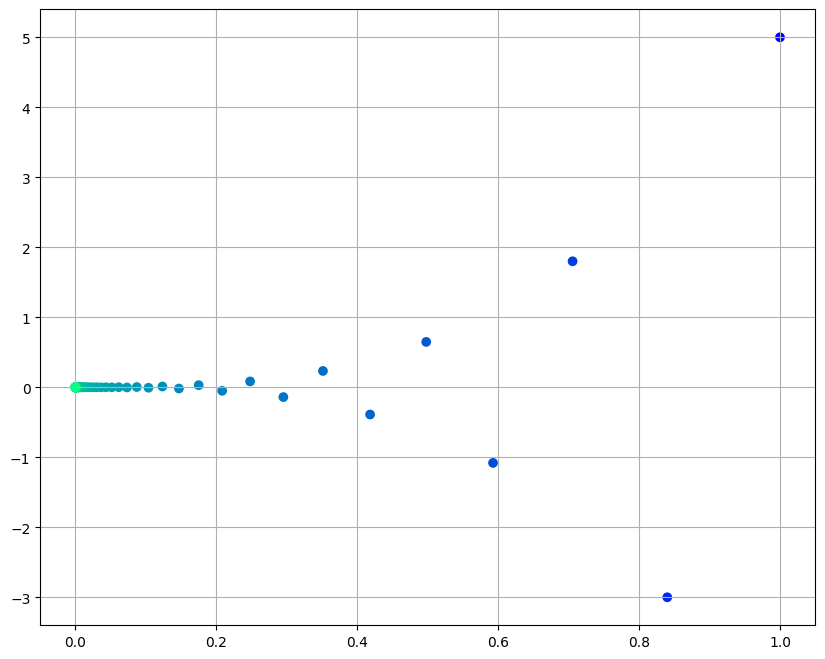

In [9]:
# For η > 0.1 see significant zig zag 
# That is because λ is big in the y direction 

x_traj, f_traj, df_traj = grad_desc(
    λ=10,
    η=0.16,
    x0=jnp.array([1.,5.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

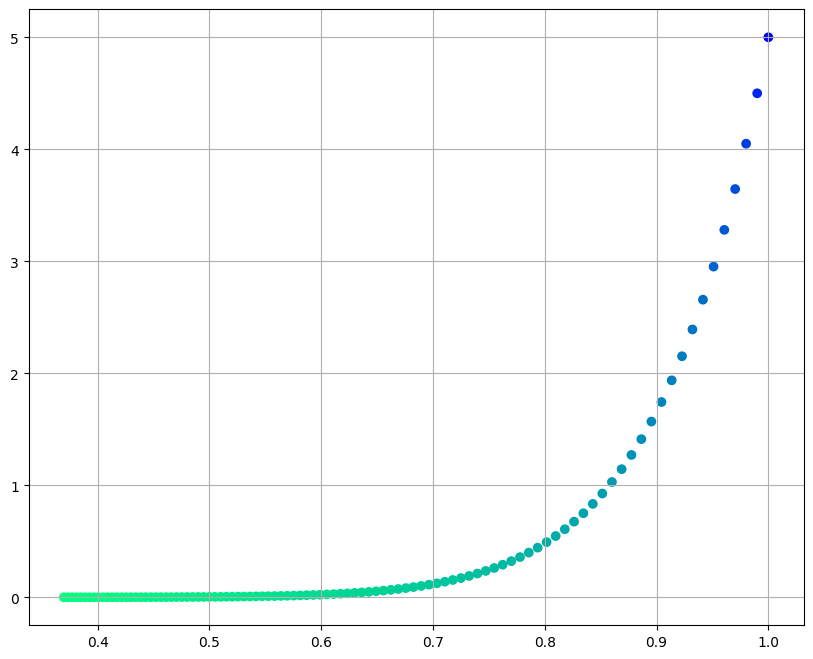

In [10]:
# No zig zag for small step size, slow convergence as a result

x_traj, f_traj, df_traj = grad_desc(
    λ=10,
    η=0.01,
    x0=jnp.array([1.,5.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

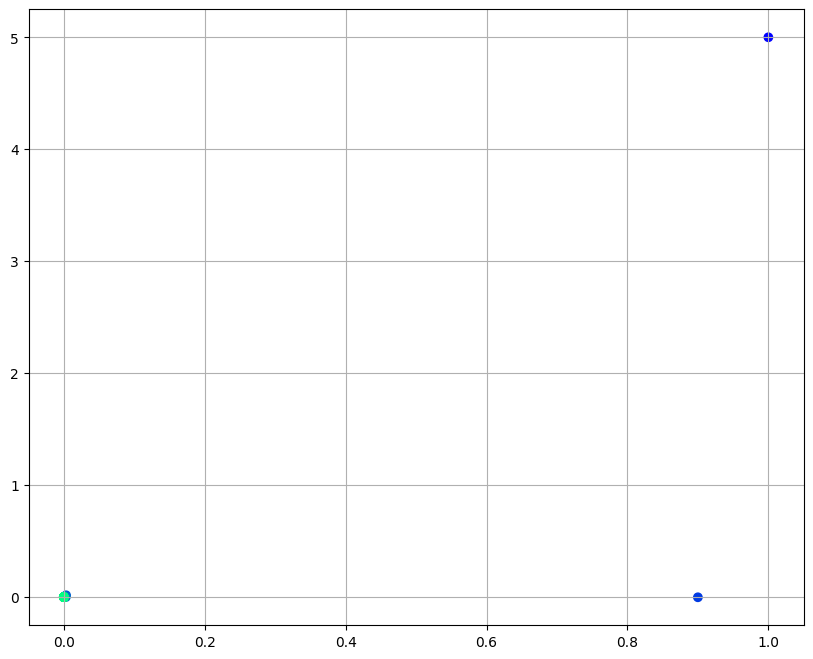

In [11]:
# With the optimal step size, we avoid the zig zag behavior 
# and also converge much more quickly

x_traj, f_traj, df_traj = grad_desc_optimal_step(
    λ=10,
    x0=jnp.array([1.,5.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

#### x0 = [5, 1]
- For constant η > 0.1 see significant zig zag that is because λ is big in the y direction, and it becomes easy to overstep in the y direction
- For constant η <= 0.1, No zig zag for small step size, slow convergence as a result
- With the optimal step size, it is interesting that we still observe a zig-zag pattern in the trajectory (why?)

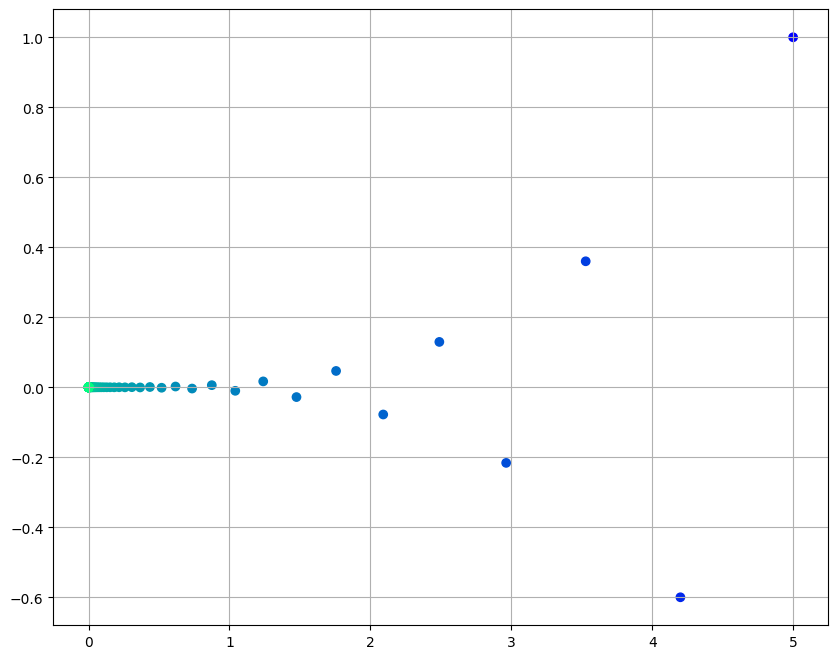

In [12]:
# For η > 0.1 see significant zig zag 
# That is because λ is big in the y direction 

x_traj, f_traj, df_traj = grad_desc(
    λ=10,
    η=0.16,
    x0=jnp.array([5.,1.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

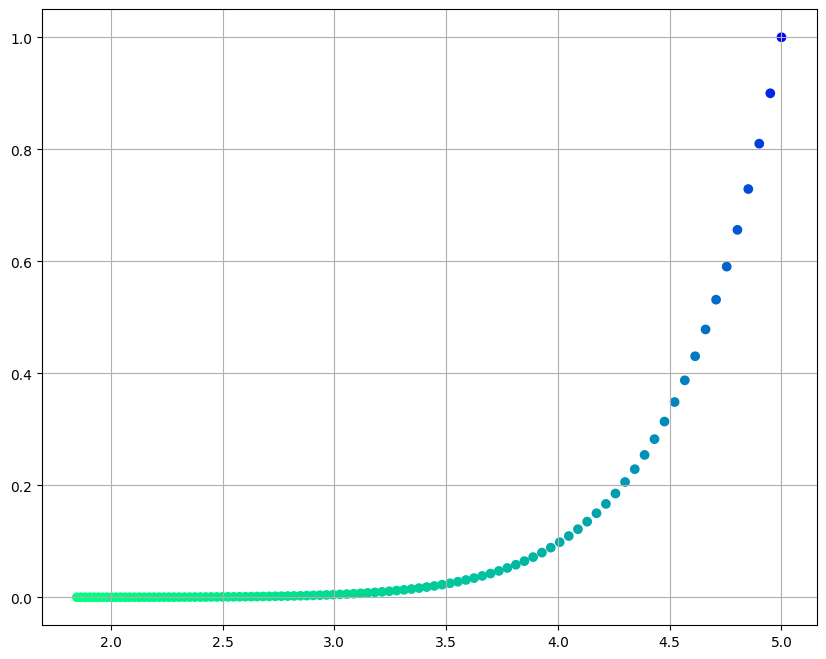

In [13]:
# No zig zag for small step size, slow convergence as a result
x_traj, f_traj, df_traj = grad_desc(
    λ=10,
    η=0.01,
    x0=jnp.array([5.,1.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

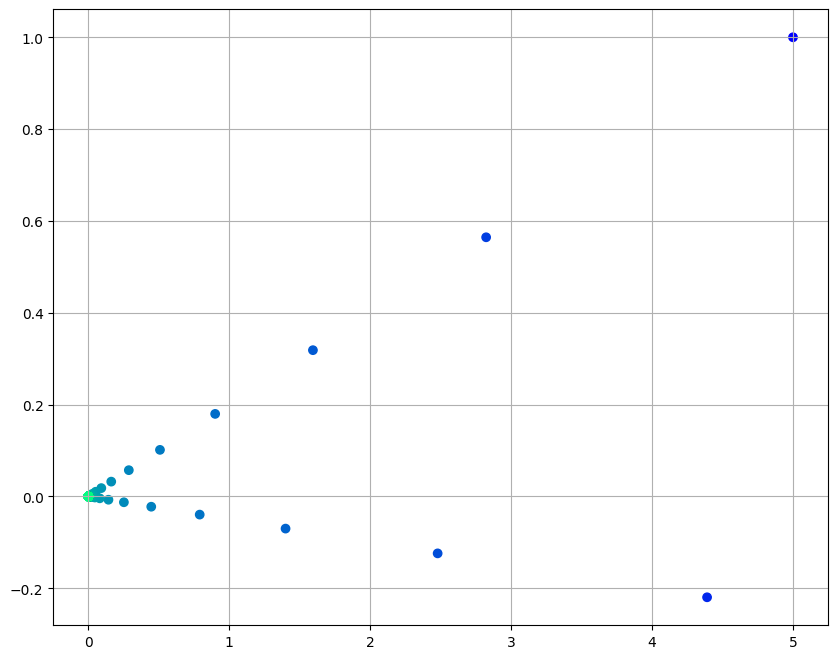

In [14]:
# With the optimal step size, we avoid the zig zag behavior 
# and also converge much more quickly

x_traj, f_traj, df_traj = grad_desc_optimal_step(
    λ=10,
    x0=jnp.array([5., 1.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

### $\lambda=1$

#### x0 = [1, 5]
- For constant η, we don't see zig zag behaviors across the board. It is due to the fact that f scales equally in x and y directions, such that the gradient descent points to the minimum to begin with. 
- With the optimal step size, we approach the minimum in one step.

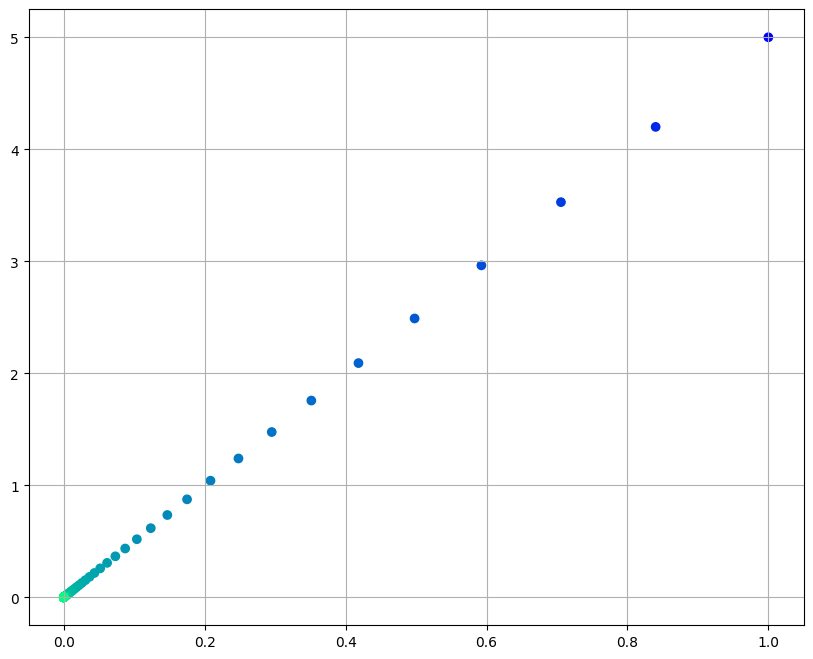

In [15]:
# No zig zag, a straight line to zero
# because f scale equally in both x and y direction

x_traj, f_traj, df_traj = grad_desc(
    λ=1,
    η=0.16,
    x0=jnp.array([1.,5.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

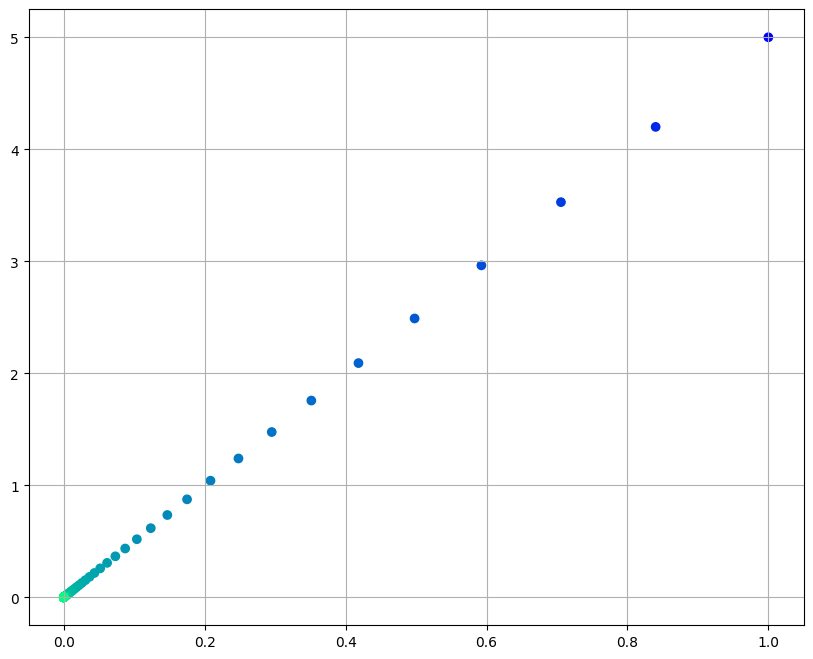

In [16]:
# No zig zag, a straight line to zero
# because f scale equally in both x and y direction

x_traj, f_traj, df_traj = grad_desc(
    λ=1,
    η=0.16,
    x0=jnp.array([1.,5.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

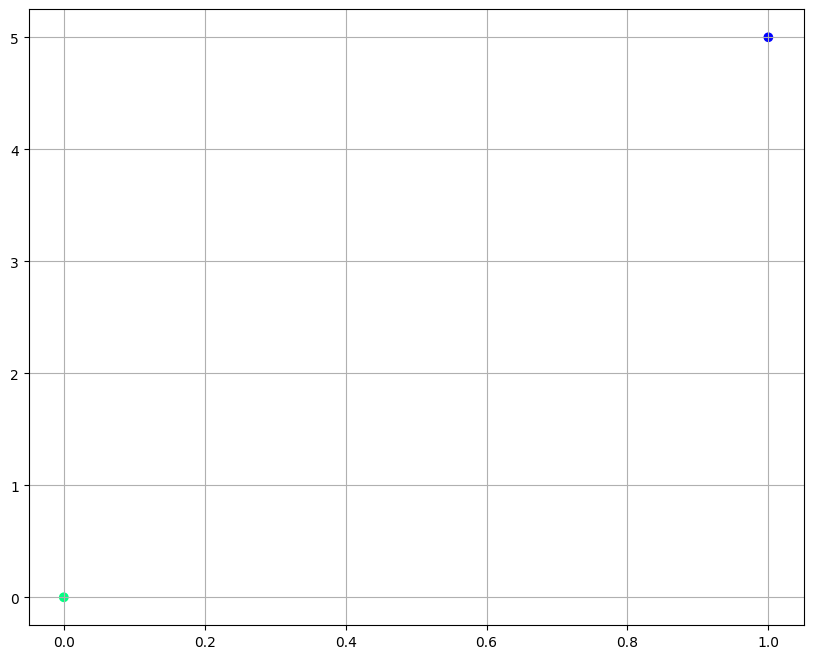

In [17]:
# With the optimal step size, we avoid the zig zag behavior 
# and also converge much more quickly

x_traj, f_traj, df_traj = grad_desc_optimal_step(
    λ=1,
    x0=jnp.array([1.,5.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

#### x0 = [5, 1]
- For constant η, we don't see zig zag behaviors across the board. It is due to the fact that f scales equally in x and y directions, such that the gradient descent points to the minimum to begin with. 
- With the optimal step size, we approach the minimum in one step.

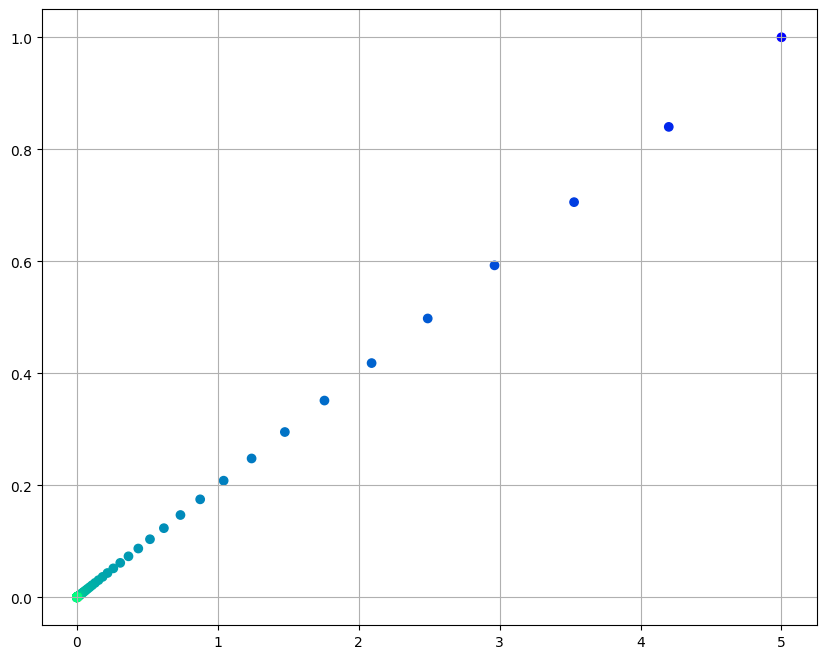

In [18]:
# For η > 0.1 see significant zig zag 
# That is because λ is big in the y direction 

x_traj, f_traj, df_traj = grad_desc(
    λ=1,
    η=0.16,
    x0=jnp.array([5.,1.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

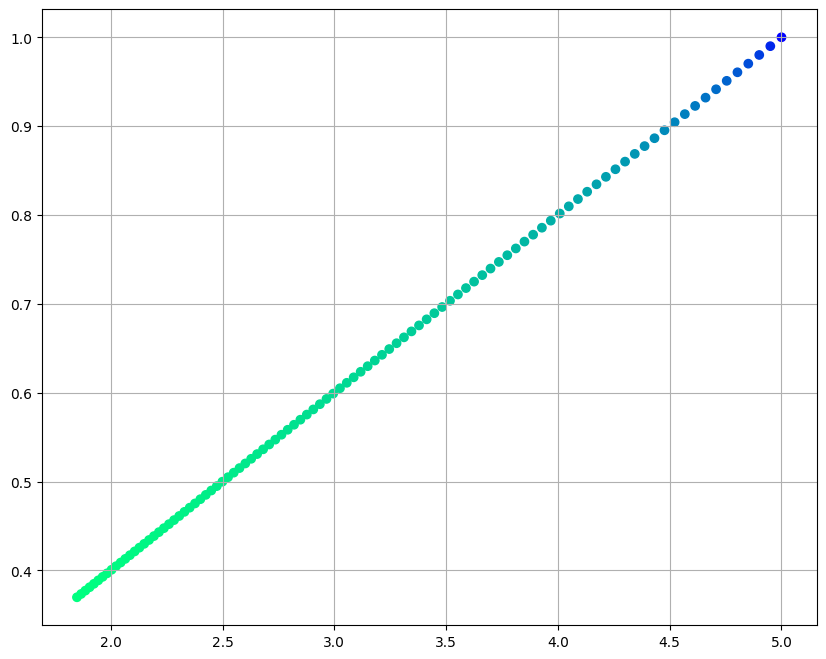

In [19]:
# No zig zag for small step size, slow convergence as a result

x_traj, f_traj, df_traj = grad_desc(
    λ=1,
    η=0.01,
    x0=jnp.array([5.,1.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

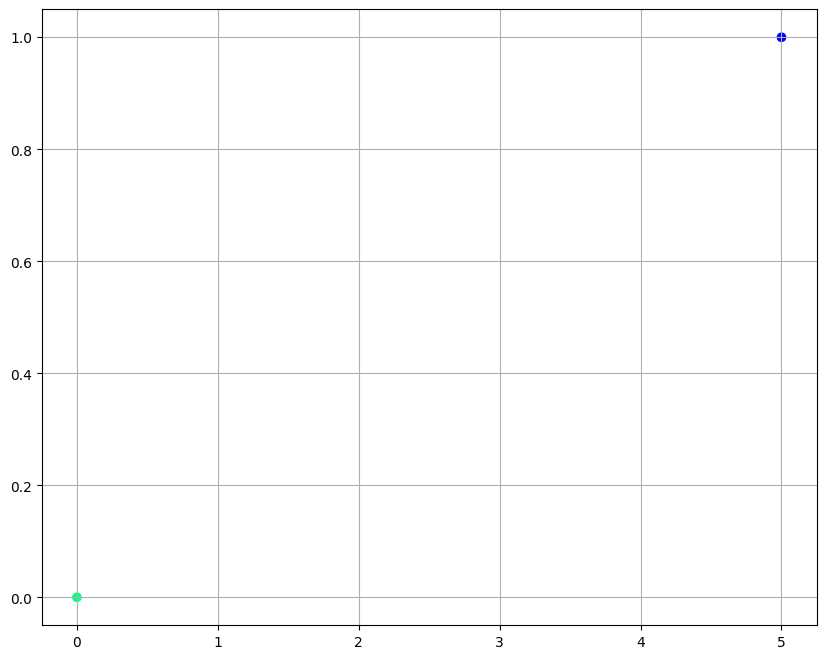

In [20]:
# With the optimal step size, we avoid the zig zag behavior 
# and also converge much more quickly

x_traj, f_traj, df_traj = grad_desc_optimal_step(
    λ=1,
    x0=jnp.array([5.,1.]).T,
    n_iter=1e2
)

##### Plotting #####
fig, ax = plot_grad_desc(x_traj, f_traj, df_traj)

## Problem 2

In [21]:
A = np.array([
    [1, 1],
    [0, 1],
])
B = np.array([[0, 1]]).T
x0 = np.array([[1, 0]]).T
T = 20
Q_T = 10 * jnp.eye(2)
Q = 1 * jnp.eye(2)
R = 1 * jnp.eye(1)

In [22]:
A

array([[1, 1],
       [0, 1]])

In [23]:
arr = np.arange(0, T,)
arr_encoded = np.zeros((arr.size, arr.max()+1), dtype=int)
arr_encoded[np.arange(arr.size),arr] = 1.

F = []

# Create a diagonal block matrix whose diagonal entries are R
for row in arr_encoded:
    block_row = []
    for col in row:
        block_row.append(R*col)
    F.append(block_row)

F = jnp.block(F)

F.shape,F

((20, 20),
 Array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],

In [24]:
arr = np.arange(0, T+1,)
arr_encoded = np.zeros((arr.size, arr.max()+1), dtype=int)
arr_encoded[np.arange(arr.size),arr] = 1.
E = []

# Create a diagonal block matrix with all Q
for row in arr_encoded:
    block_row = []
    for col in row:
        block_row.append(Q*col)
    E.append(block_row)

# Replace the last diagonal with Q_T
block_row = []
for col in arr_encoded[-1]:
    block_row.append(Q_T*col)
E[-1] = block_row
E = jnp.block(E)

E.shape, E

((42, 42),
 Array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., 10.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 10.]], dtype=float32))

In [25]:
D = []

# Block Matrix with T+1 Block Rows and T Block Columns
for row in np.arange(0,T+1):
    block_row = []
    for col in np.arange(0,T):
        if row>col:
            block_row.append(np.linalg.matrix_power(A,int(row-col-1))@B*1)
        else:
            # Make sure row_num==col_num and everything above is all zero
            block_row.append(B*0)
    D.append(block_row)
D = jnp.block(D)
D.shape, D

((42, 20),
 Array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],

In [26]:
# Create block matrix C, that is a column stack of A raise to sequential powers
C = np.block([[np.eye(2)@np.linalg.matrix_power(A,i)] for i in range(T+1)])

C

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 1.,  2.],
       [ 0.,  1.],
       [ 1.,  3.],
       [ 0.,  1.],
       [ 1.,  4.],
       [ 0.,  1.],
       [ 1.,  5.],
       [ 0.,  1.],
       [ 1.,  6.],
       [ 0.,  1.],
       [ 1.,  7.],
       [ 0.,  1.],
       [ 1.,  8.],
       [ 0.,  1.],
       [ 1.,  9.],
       [ 0.,  1.],
       [ 1., 10.],
       [ 0.,  1.],
       [ 1., 11.],
       [ 0.,  1.],
       [ 1., 12.],
       [ 0.,  1.],
       [ 1., 13.],
       [ 0.,  1.],
       [ 1., 14.],
       [ 0.,  1.],
       [ 1., 15.],
       [ 0.,  1.],
       [ 1., 16.],
       [ 0.,  1.],
       [ 1., 17.],
       [ 0.,  1.],
       [ 1., 18.],
       [ 0.,  1.],
       [ 1., 19.],
       [ 0.,  1.],
       [ 1., 20.],
       [ 0.,  1.]])

In [27]:
# Calculate b based on definition
b_ = -2*D.T@E@C@x0
b_

Array([[-722.],
       [-666.],
       [-612.],
       [-560.],
       [-510.],
       [-462.],
       [-416.],
       [-372.],
       [-330.],
       [-290.],
       [-252.],
       [-216.],
       [-182.],
       [-150.],
       [-120.],
       [ -92.],
       [ -66.],
       [ -42.],
       [ -20.],
       [   0.]], dtype=float32)

In [28]:
# Calculate Q based on definition
Q_ = F + D.T@E@D 
Q_

Array([[5749., 5386., 5025., 4666., 4310., 3958., 3611., 3270., 2936.,
        2610., 2293., 1986., 1690., 1406., 1135.,  878.,  636.,  410.,
         201.,   10.],
       [5386., 5054., 4719., 4386., 4055., 3727., 3403., 3084., 2771.,
        2465., 2167., 1878., 1599., 1331., 1075.,  832.,  603.,  389.,
         191.,   10.],
       [5025., 4719., 4414., 4106., 3800., 3496., 3195., 2898., 2606.,
        2320., 2041., 1770., 1508., 1256., 1015.,  786.,  570.,  368.,
         181.,   10.],
       [4666., 4386., 4106., 3827., 3545., 3265., 2987., 2712., 2441.,
        2175., 1915., 1662., 1417., 1181.,  955.,  740.,  537.,  347.,
         171.,   10.],
       [4310., 4055., 3800., 3545., 3291., 3034., 2779., 2526., 2276.,
        2030., 1789., 1554., 1326., 1106.,  895.,  694.,  504.,  326.,
         161.,   10.],
       [3958., 3727., 3496., 3265., 3034., 2804., 2571., 2340., 2111.,
        1885., 1663., 1446., 1235., 1031.,  835.,  648.,  471.,  305.,
         151.,   10.],
       [36

In [29]:
F.shape

(20, 20)

In [30]:
D.shape

(42, 20)

In [31]:
E.shape

(42, 42)

In [32]:
g = lambda u: (1/2*u.T@Q_@u - b_.T@u)[0,0]

dg = jax.grad(g)

dg(np.ones((20,1)))

Array([[52888.],
       [49791.],
       [46696.],
       [43605.],
       [40521.],
       [37448.],
       [34391.],
       [31356.],
       [28350.],
       [25381.],
       [22458.],
       [19591.],
       [16791.],
       [14070.],
       [11441.],
       [ 8918.],
       [ 6516.],
       [ 4251.],
       [ 2140.],
       [  201.]], dtype=float32)

In [33]:
def grad_desc_optimal_step(λ, x0, n_iter=1e2):
    # Define Q
    Q = np.array([
        [1, 0],
        [0, λ]
    ])

    
    f = lambda x: 1/2 * x.T @ Q @ x 

    # Take gradient with Jax
    df_dx = jax.grad(f)

    # Initiate variables for logging
    x_traj = []
    f_traj = []
    df_traj = []
    x_next = x0
    
    f_best = np.inf
    x_best = None
    
    for _ in range(int(n_iter)):
        # Log x, f, df
        x_traj.append(x_next)
    
        f_next = f(x_next)
        f_traj.append(f_next)
    
        df_next = df_dx(x_next)
        df_traj.append(df_next)
        
        # Record the x_best and f_best by comparing with the previous best f
        if f_best>f_next:
            f_best = f_next
            x_best = x_next

        # Calculate the optimal step based on the derived formula
        d = -df_next
        η = d.T@d / (d.T@Q@d)

        # Perform gradient descent
        x_next = x_next - η * df_dx(x_next)
    
    x_traj = jnp.array(x_traj)
    f_traj = jnp.array(x_traj)
    df_traj = jnp.array(x_traj)

    return x_traj, f_traj, df_traj
    

In [34]:
def grad_desc_optimal_step(u0, max_iter=1e4, thres_error=1e-5):
    # Define g
    g = lambda u: (1/2*u.T@Q_@u - b_.T@u)[0,0]

    # Take gradient with Jax
    dg = jax.grad(g)

    # Initiate variables for logging
    u_traj = []
    g_traj = []
    dg_traj = []
    u_next = u0
    
    g_best = np.inf
    u_best = None
    
    for _ in range(int(max_iter)):
        # Log u, g, dg
        u_traj.append(u_next)
    
        g_next = g(u_next)
        g_traj.append(g_next)

        if abs(g_next-g_best) < thres_error:
            break
    
        dg_next = dg(u_next)
        dg_traj.append(dg_next)
        
        # Record the u_best and g_best by comparing with the previous best g
        if g_best>g_next:
            g_best = g_next
            u_best = u_next

        d = -dg_next
        η = d.T@d / (d.T@Q_@d)

        # Perform gradient descent
        u_next = u_next - η * dg_next
    
    u_traj = jnp.array(u_traj)
    g_traj = jnp.array(u_traj)
    dg_traj = jnp.array(u_traj)

    return u_traj, g_traj, dg_traj, u_best, g_best
    

In [35]:
u_traj, g_traj, dg_traj, u_best, g_best = grad_desc_optimal_step(np.ones((20,1)))

In [36]:
u_best, g_best

(Array([[-0.6459    ],
        [-0.01319054],
        [ 0.2105224 ],
        [ 0.22274862],
        [ 0.15479854],
        [ 0.07829656],
        [ 0.02269153],
        [-0.00692374],
        [-0.01626588],
        [-0.01354499],
        [-0.00559433],
        [ 0.00302509],
        [ 0.00942469],
        [ 0.01150498],
        [ 0.00768338],
        [-0.00224895],
        [-0.01512608],
        [-0.02204243],
        [-0.00752994],
        [ 0.04628965]], dtype=float32),
 Array(-53.97545, dtype=float32))